### 1- Download the necessary modules

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### 2- Import the data in excel file and format them

In [65]:
df_raw =  pd.read_excel('séries_AirLiquide.xlsx',sheet_name ='part1')
df_raw.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


In [66]:
df = df_raw
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40
0,1987M03,0.305684,11.1670,NaN
1,1987M04,0.306773,11.8679,NaN
2,1987M05,0.307862,11.3422,NaN
3,1987M06,0.308952,11.0714,NaN
4,1987M07,0.310043,10.9918,NaN
5,1987M08,0.311138,11.1511,1483.02
6,1987M09,0.312236,11.0873,1524.00
7,1987M10,0.313339,10.8962,1456.88
8,1987M11,0.314448,8.5226,1116.47
9,1987M12,0.315563,7.9969,1026.98


### 3- Preprocessing

In [67]:
df['year']=[x.split("M")[0] for x in df['Unnamed: 0']]
df['month']=[x.split("M")[1] for x in df['Unnamed: 0']]
df.head(10)

,Unnamed: 0,Div AirLiquide (lissé),Prix Airliquide,Indice CAC40,year,month
0,1987M03,0.305684,11.1670,NaN,1987,03
1,1987M04,0.306773,11.8679,NaN,1987,04
2,1987M05,0.307862,11.3422,NaN,1987,05
3,1987M06,0.308952,11.0714,NaN,1987,06
4,1987M07,0.310043,10.9918,NaN,1987,07
5,1987M08,0.311138,11.1511,1483.02,1987,08
6,1987M09,0.312236,11.0873,1524.00,1987,09
7,1987M10,0.313339,10.8962,1456.88,1987,10
8,1987M11,0.314448,8.5226,1116.47,1987,11
9,1987M12,0.315563,7.9969,1026.98,1987,12


In [68]:
# Change to annual values
df_yearly = pd.DataFrame() 

dividend_yearly = df.groupby('year')['Div AirLiquide (lissé)'].mean().round(3)
df_yearly['Dividend'] = dividend_yearly

price_yearly = df.groupby('year')['Prix Airliquide'].mean().round(3)
df_yearly['Price'] =  price_yearly

indiceCAC40_yearly = df.groupby('year')['Indice CAC40'].mean().round(3)
df_yearly['CAC40_basis_points']  = indiceCAC40_yearly

df_yearly.head(10)

,Dividend,Price,CAC40_basis_points
year,,,
1987,0.311,10.609,1321.470
1988,0.323,8.497,1229.658
1989,0.336,10.926,1750.667
1990,0.350,12.387,1859.954
1991,0.371,12.834,1764.264
1992,0.398,14.827,1846.913
1993,0.425,16.328,2012.700
1994,0.448,17.275,2065.525
1995,0.469,18.181,1869.042


In [69]:
# Calculate the necessary rates 
df_yearly['Dividend_Rate'] = np.log(df_yearly['Dividend']/df_yearly['Dividend'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_yearly['return_price'] = np.log(df_yearly['Price']/df_yearly['Price'].shift(1)) # p(t)/p(t-1)
df_yearly['return_CAC40'] = np.log(df_yearly['CAC40_basis_points']/df_yearly['CAC40_basis_points'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_yearly.head(10)

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40
year,,,,,,
1987,0.311,10.609,1321.470,NaN,NaN,NaN
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958


In [70]:
# Complete the missing values 
df_raw_part2 = pd.read_excel('séries_AirLiquide.xlsx',sheet_name ='part2')
df_raw_part2['year'] = df_raw_part2['year'].astype(str)
df_raw_part2.set_index('year',inplace = True)
# Calculate the necessary rates 
df_raw_part2['Dividend_Rate'] = np.log(df_raw_part2['Dividend']/df_raw_part2['Dividend'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)
df_raw_part2['return_price'] = np.log(df_raw_part2['Price']/df_raw_part2['Price'].shift(1)) # p(t)/p(t-1)
df_raw_part2['return_CAC40'] = np.log(df_raw_part2['CAC40_basis_points']/df_raw_part2['CAC40_basis_points'].shift(1)) # nbrepoints(t)/nbrepoints(t-1)

In [71]:
# Drop the row 2020
df_raw_part2.drop(['2020'],axis = 0, inplace = True)
df_raw_part2

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40
year,,,,,,
2021,2.500,139.38,5256.0,0.003205,0.086088,-0.087364
2022,2.636,134.70,3942.0,0.052972,-0.034154,-0.287682


In [72]:
# Integrate the values to the data
df_yearly_1 = pd.concat([df_yearly,df_raw_part2], axis = 0)
df_yearly_1

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40
year,,,,,,
1987,0.311,10.609,1321.470,NaN,NaN,NaN
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958


In [73]:
# Load french treasuries bonds and beta
french_bonds_rate =  pd.read_excel('tx_dintéret_OAT_1987_2022.xlsx',sheet_name = 'Final', header = None)
french_bonds_rate.columns = ['year','french_bonds_rate']
french_bonds_rate['year'] = french_bonds_rate['year'].astype(str)
french_bonds_rate.set_index('year', inplace = True)
print(french_bonds_rate)

beta =  pd.read_excel('beta_Air_liquide_1987_2022.xlsx', header = None)
beta.columns = ['year','beta']
beta['year'] = beta['year'].astype(str)
beta.set_index('year', inplace = True)
print(beta)

      french_bonds_rate
year                   
1987           0.096800
1988           0.080000
1989           0.078000
1990           0.075000
1991           0.072000
1992           0.069000
1993           0.067000
1994           0.065000
1995           0.060000
1996           0.062000
1997           0.055000
1998           0.050000
1999           0.034100
2000           0.007000
2001           0.032800
2002           0.033100
2003           0.024500
2004           0.023700
2005           0.042100
2006           0.029100
2007           0.018750
2008           0.042343
2009           0.036488
2010           0.031170
2011           0.033211
2012           0.025360
2013           0.022044
2014           0.016664
2015           0.008419
2016           0.004679
2017           0.008099
2018           0.007841
2019           0.001302
2020          -0.001453
2021           0.007367
2022           0.017008
       beta
year       
1987  0.990
1988  0.950
1989  1.220
1990  0.830
1991  1.510
1992

In [74]:
# Concatenate all our annual data
df_yearly_final = pd.concat([df_yearly_1,french_bonds_rate, beta], axis=1)
df_yearly_final

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40,french_bonds_rate,beta
year,,,,,,,,
1987,0.311,10.609,1321.470,NaN,NaN,NaN,0.096800,0.990
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009,0.080000,0.950
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261,0.078000,1.220
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555,0.075000,0.830
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818,0.072000,1.510
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782,0.069000,1.390
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962,0.067000,1.060
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907,0.065000,1.440
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958,0.060000,0.900


In [75]:
# Drop the row 1987
df_yearly_final.drop(['1987'], axis=0, inplace = True)
df_yearly_final.head(10)

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40,french_bonds_rate,beta
year,,,,,,,,
1988,0.323,8.497,1229.658,0.037859,-0.221990,-0.072009,0.080,0.95
1989,0.336,10.926,1750.667,0.039459,0.251432,0.353261,0.078,1.22
1990,0.350,12.387,1859.954,0.040822,0.125502,0.060555,0.075,0.83
1991,0.371,12.834,1764.264,0.058269,0.035450,-0.052818,0.072,1.51
1992,0.398,14.827,1846.913,0.070250,0.144352,0.045782,0.069,1.39
1993,0.425,16.328,2012.700,0.065637,0.096432,0.085962,0.067,1.06
1994,0.448,17.275,2065.525,0.052704,0.056379,0.025907,0.065,1.44
1995,0.469,18.181,1869.042,0.045810,0.051117,-0.099958,0.060,0.90
1996,0.492,20.877,2082.438,0.047876,0.138271,0.108113,0.062,0.65


In [76]:
periods = 5
df_yearly_lisse = df_yearly_final
df_yearly_lisse = df_yearly_final.rolling(periods).mean()
df_yearly_lisse.head(10)

,Dividend,Price,CAC40_basis_points,Dividend_Rate,return_price,return_CAC40,french_bonds_rate,beta
year,,,,,,,,
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,0.3556,11.8942,1690.2912,0.049332,0.066949,0.066954,0.0748,1.180
1993,0.3760,13.4604,1846.8996,0.054887,0.130634,0.098548,0.0722,1.202
1994,0.3984,14.7302,1909.8712,0.057536,0.091623,0.033078,0.0696,1.246
1995,0.4222,15.8890,1911.6888,0.058534,0.076746,0.000975,0.0666,1.260
1996,0.4464,17.4976,1975.3236,0.056455,0.097310,0.033161,0.0646,1.088


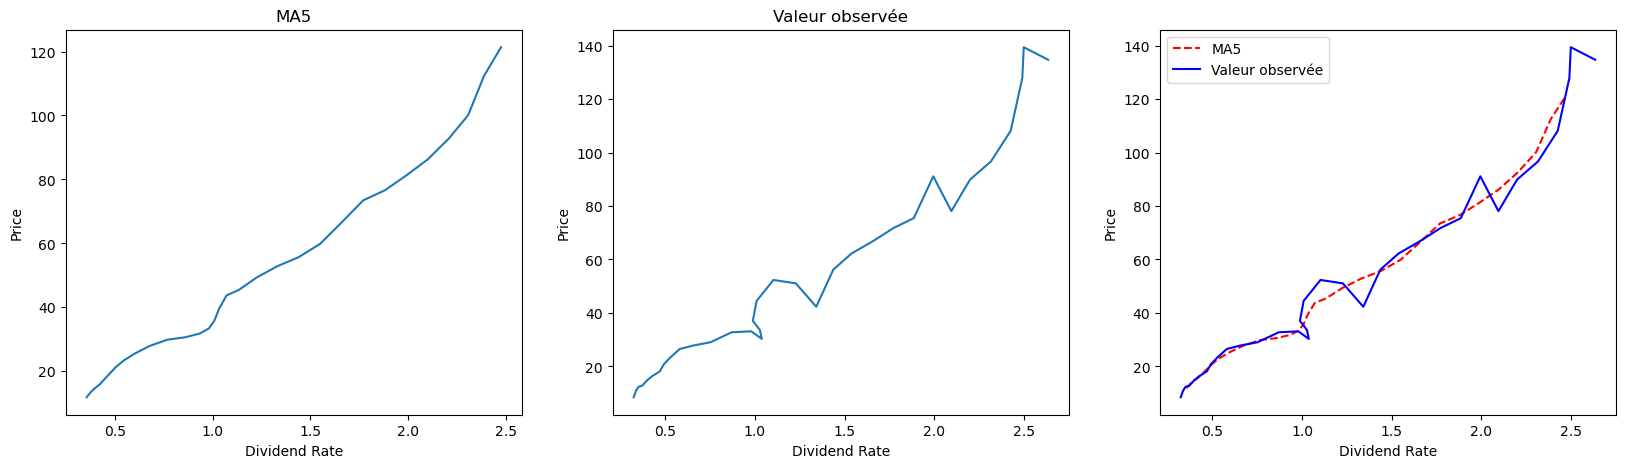

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(df_yearly_lisse.Dividend,df_yearly_lisse.Price)
axes[0].set_xlabel('Dividend Rate')
axes[0].set_ylabel('Price')
axes[0].set_title('MA5')
axes[1].plot(df_yearly_final.Dividend,df_yearly_final.Price)
axes[1].set_xlabel('Dividend Rate')
axes[1].set_ylabel('Price')
axes[1].set_title('Valeur observée')

axes[2].plot(df_yearly_lisse.Dividend,df_yearly_lisse.Price, '--r', )
axes[2].plot(df_yearly_final.Dividend,df_yearly_final.Price, '-b')
axes[2].set_xlabel('Dividend Rate')
axes[2].set_ylabel('Price')
axes[2].legend(['MA5', 'Valeur observée'])

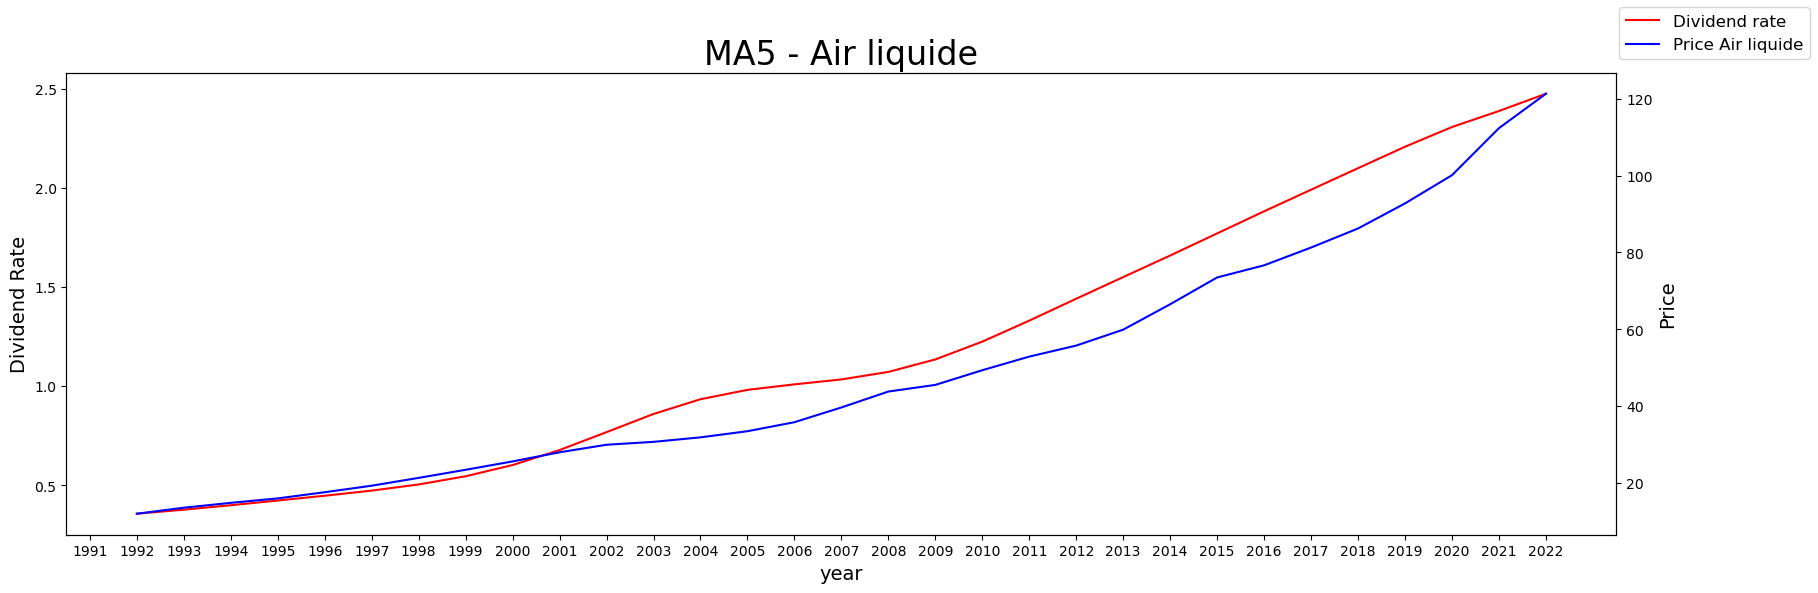

In [78]:
fig,ax = plt.subplots(figsize=(20,6))
# make the dividend plot
ax.plot(df_yearly_lisse.Dividend, color = "red", label = "Dividend Rate (%)")
ax.set_title("MA5 - Air liquide", fontsize = 24)
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax.set_ylabel("Dividend Rate",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df_yearly_lisse.Price, color = "blue", label = "Price")
ax2.set_ylabel("Price",fontsize=14)
fig.legend(labels = ['Dividend rate', 'Price'], fontsize = 12)

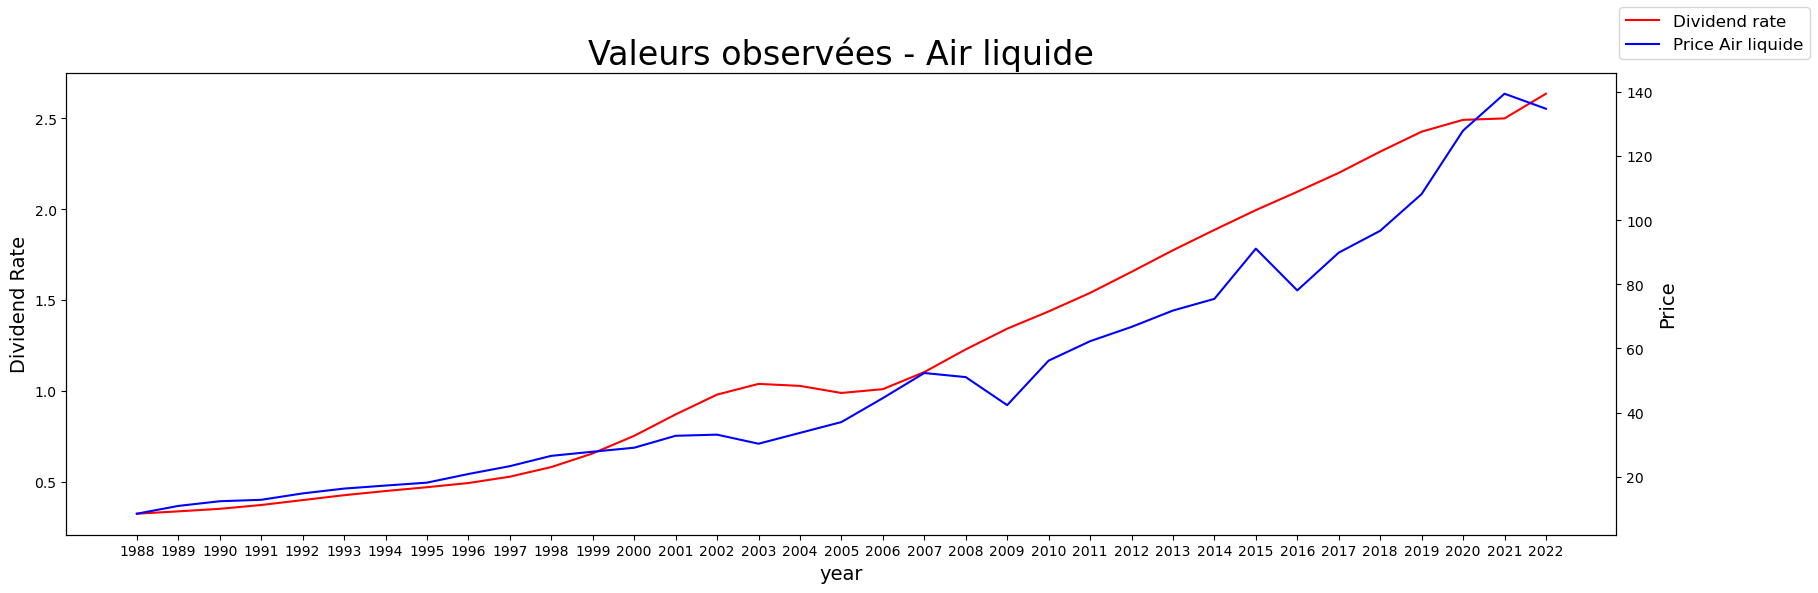

In [79]:
fig,ax = plt.subplots(figsize=(20,6))
# make the dividend plot
ax.plot(df_yearly_final.Dividend, color = "red", label = "Dividend Rate (%)")
ax.set_title("Valeurs observées - Air liquide", fontsize = 24)
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax.set_ylabel("Dividend Rate",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(df_yearly_final.Price, color = "blue", label = "Price")
ax2.set_ylabel("Price",fontsize=14)
fig.legend(labels = ['Dividend rate', 'Price'], fontsize = 12)


### 4 - Estimation of the model

In [80]:
data = df_yearly_final

dividend = data['Dividend']
dividend_rate = data['Dividend_Rate']
price = data['Price']
return_CAC40 = data['return_CAC40']
french_bonds_rate = data['french_bonds_rate']
beta = data['beta']

Y = (dividend/price.shift(1))-french_bonds_rate
gt = dividend_rate

# Get rid of the nan values 
Y=Y[1:]
gt=gt[1:]

print(Y)
print(gt)

year
1989   -0.038457
1990   -0.042966
1991   -0.042049
1992   -0.037989
1993   -0.038336
1994   -0.037562
1995   -0.032851
1996   -0.034939
1997   -0.029757
1998   -0.025128
1999   -0.009415
2000    0.020029
2001   -0.002868
2002   -0.003239
2003    0.006822
2004    0.010182
2005   -0.012774
2006   -0.001872
2007    0.006023
2008   -0.018884
2009   -0.010210
2010    0.002775
2011   -0.005827
2012    0.001223
2013    0.004548
2014    0.009598
2015    0.018022
2016    0.018329
2017    0.020073
2018    0.017944
2019    0.023804
2020    0.024502
2021    0.012182
2022    0.001904
dtype: float64
year
1989    0.039459
1990    0.040822
1991    0.058269
1992    0.070250
1993    0.065637
1994    0.052704
1995    0.045810
1996    0.047876
1997    0.068722
1998    0.095828
1999    0.121607
2000    0.138101
2001    0.145757
2002    0.118038
2003    0.058519
2004   -0.010654
2005   -0.038715
2006    0.021032
2007    0.089074
2008    0.107353
2009    0.088774
2010    0.068397
2011    0.068575
2012  

#### 4-1 ARMA

In [81]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
Y = Y.values
X = gt.values
# fit model
p = 2
d = 0 
q = 0
model_ARIMA = ARIMA(endog=Y, exog=X, order=(p, d, q))
fit_ARIMA = model_ARIMA.fit()
print(fit_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 105.815
Date:                Wed, 16 Aug 2023   AIC                           -201.629
Time:                        23:33:44   BIC                           -193.997
Sample:                             0   HQIC                          -199.027
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0121      0.014     -0.866      0.386      -0.040       0.015
x1             0.0288      0.062      0.464      0.643      -0.093       0.150
ar.L1          0.7951      0.170      4.682      0.0